### Ejercicio (01/04/22):

Elija el punto de corte, agregue las líneas de código necesarias para graficar una línea vertical y rotular el punto de corte.

In [1]:
from random import expovariate
from statistics import mean, pstdev
from math import inf as Infinity
from random import seed
from matplotlib.pyplot import *
from time import time
import numpy as np

In [3]:
def mm1_W(lamda, mu, Num_Pkts):
    #Num_Pkts = 100000                   # Numero de paquetes a simular
    #T = 100000
    count = 0                           # Contador de paquetes simulados
    t = 0
    N = 0                               # Variable de estado: numero de paquetes en el sistema

    tll = expovariate(lamda)            # Tiempo de llegada
    ts = Infinity                       # Tiempo de salida

    # Variables de salida
    tll_Data = []                       # Lista de tiempos de llegada
    ts_Data = []                        # Lista de tiempos de salida
    r_Data = []                         # Lista de retrasos individuales

    while count < Num_Pkts:
    #while t < T:
        if tll < ts:                           # Evento de llegada
            t = tll
            tll_Data.append(t)
            N = N + 1.0
            tll = t + expovariate(lamda) 
            if N == 1:
                ts = t + expovariate(mu)
        else:                                         # Evento de salida
            t = ts 
            ts_Data.append(t)
            N = N - 1.0
            count = count + 1                         # Paquetes simulados
            if N > 0:
                ts = t + expovariate(mu)
            else:
                ts = Infinity

    # Estimación del retraso promedio:

    for i in range(Num_Pkts):
    #for i in range(T):
        d = ts_Data[i] - tll_Data[i]
        r_Data.append(d)

    return r_Data

In [4]:
def mm1_W_cum(lamda, mu, Num_Pkts):
    Delay = mm1_W(lamda, mu, Num_Pkts)
    Delay_Cum = []
    for i in range(Num_Pkts):
        Delay_Cum.append( sum(Delay[0:i+1])/(i+1) ) #Retraso acumulado

    return Delay_Cum

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_10168/3468094838.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plot(Y[0], "k--", label="Y[0]", color='blue')
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_10168/3468094838.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plot(Y[1], "k--", label="Y[1]", color='green')
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_10168/3468094838.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plot(Y[2], "k--", label="Y[2]", color='red')
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_10168/3468094838.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> col

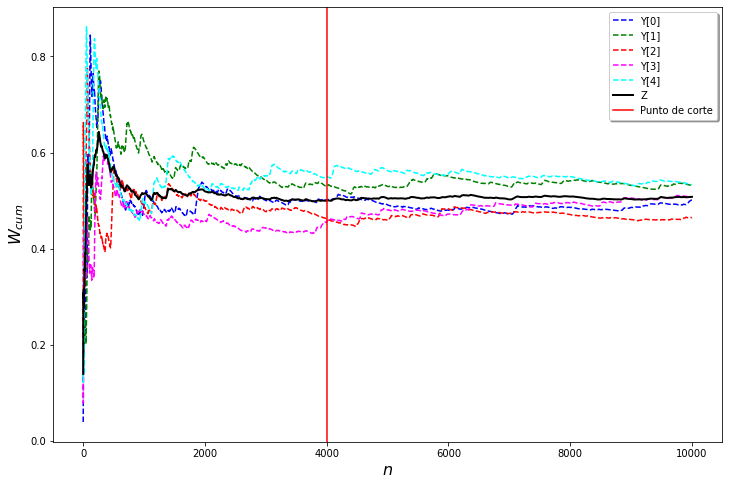

In [19]:
lamda = 4.0
mu = 6.0

n = 10000                         # Número de clientes/paquetes simulados
R = 5                             # Número de repeticiones

Y =  np.zeros( shape = (R, n) )   # Variable de salida W
D = []
# Generamos las muestras/repeticiones
for i in range(R):
    seed()
    Y[i] = mm1_W_cum(lamda, mu, n)

# Calculamos la media
Z = []
for i in range(n):
    Z.append( sum(Y[:,i]) / R ) #Se usa una lista en dos dimensiones



# Graficamos Y y Z
fig = figure(1, figsize=(12, 8))
plot(Y[0], "k--", label="Y[0]", color='blue')
plot(Y[1], "k--", label="Y[1]", color='green')
plot(Y[2], "k--", label="Y[2]", color='red')
plot(Y[3], "k--", label="Y[3]", color='magenta')
plot(Y[4], "k--", label="Y[4]", color='cyan')
plot(Z, "k", linewidth=2, label="Z")
axvline(x = 4000, color = 'red', label = 'Punto de corte')


xlabel("$n$", size=16)
ylabel("$W_{cum}$", size=16)
legend(loc='upper right', shadow=True)
show()